In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

%matplotlib inline

df = pd.read_csv("Mock_Sales_Dataset.csv")

df.head()

,Order ID,Region,Product,Units Sold,Unit Price,Total Revenue
0,ORD001,North,Widget C,45,22.73,1022.85
1,ORD002,East,Widget C,33,48.30,1593.90
2,ORD003,East,Widget A,31,27.13,841.03
3,ORD004,East,Widget C,43,25.46,1094.78
4,ORD005,West,Widget C,7,22.47,157.29


In [5]:
df.shape

(100, 6)

In [6]:
df.columns

Index(['Order ID', 'Region', 'Product', 'Units Sold', 'Unit Price',
       'Total Revenue'],
      dtype='object')

In [7]:
df.describe()

,Units Sold,Unit Price,Total Revenue
count,100.000000,100.000000,100.000000
mean,28.160000,29.610900,840.315300
std,13.744949,11.655169,542.214926
min,3.000000,10.690000,54.640000
25%,17.000000,20.347500,395.042500
50%,30.500000,27.160000,797.100000
75%,39.000000,38.995000,1099.890000
max,49.000000,49.850000,2313.810000


In [8]:
df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

Region
North    24145.09
South    21070.17
West     20983.39
East     17832.88
Name: Total Revenue, dtype: float64

In [9]:
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Widget A    1044
Widget C     917
Widget B     855
Name: Units Sold, dtype: int64

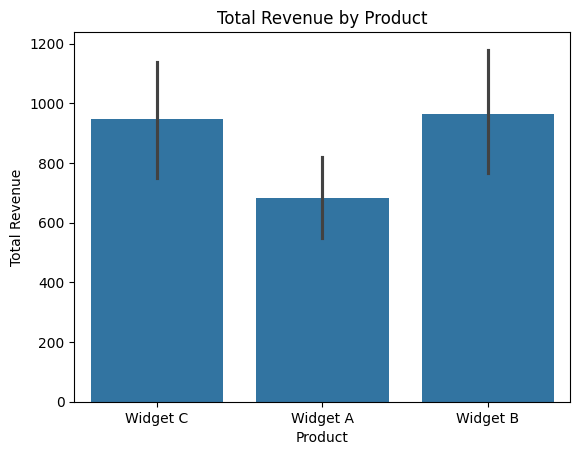

In [13]:
sns.barplot(x='Product', y='Total Revenue', data=df)
plt.title('Total Revenue by Product')
plt.show()

In [ ]:
# Question 1: What is the total revenue for each region?
region_revenue = df.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False)
region_revenue

Region
North    24145.09
South    21070.17
West     20983.39
East     17832.88
Name: Total Revenue, dtype: float64

In [18]:
# Question 2: Which product had the highest average unit price?
avg_price_by_product = df.groupby("Product")["Unit Price"].mean().sort_values(ascending=False)
avg_price_by_product

Product
Widget C    30.852581
Widget B    30.798519
Widget A    27.930952
Name: Unit Price, dtype: float64

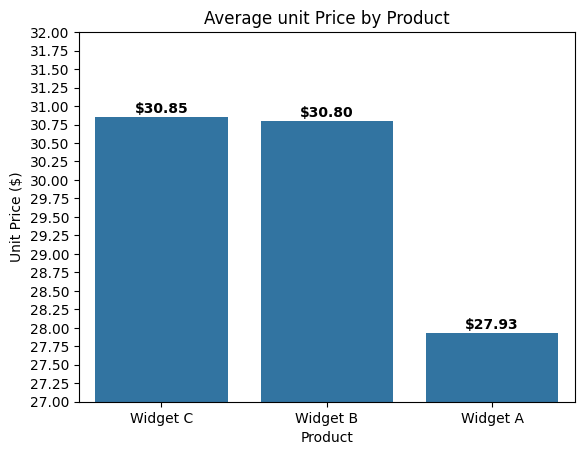

In [44]:
sns.barplot(x=avg_price_by_product.index, y=avg_price_by_product.values)
plt.title("Average unit Price by Product")
plt.ylabel("Unit Price ($)")
plt.xlabel("Product")
for i, v in enumerate(avg_price_by_product.values):
    plt.text(i, v + 0.05, f"${v:.2f}", ha='center', fontweight='bold')
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(.25))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.ylim(27, 32)
plt.show()

In [ ]:
# Question 3: What's the Total Revenue and Units Sold per Product?
# Step 1: Group and Summarize
product_summary = df.groupby(["Product"])[["Total Revenue", "Units Sold"]].sum().sort_values("Total Revenue", ascending=False).head(10)
product_summary


,Total Revenue,Units Sold
Product,,
Widget C,29360.42,917
Widget A,28619.42,1044
Widget B,26051.69,855


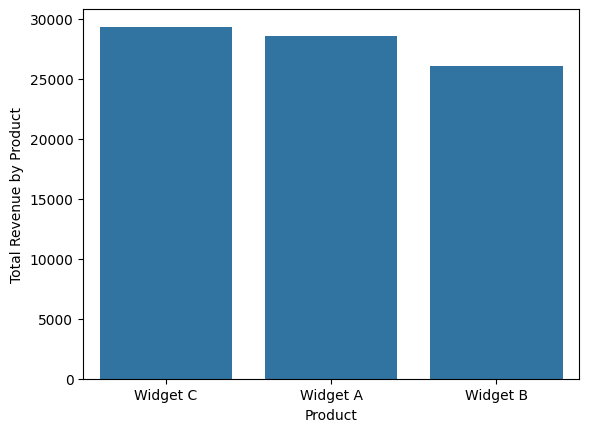

In [47]:
# Step 2: Visualize Total Revenue per Product 
sns.barplot(x=product_summary.index, y=product_summary["Total Revenue"])
plt.ylabel("Total Revenue by Product")
plt.xlabel("Product")
plt.show()

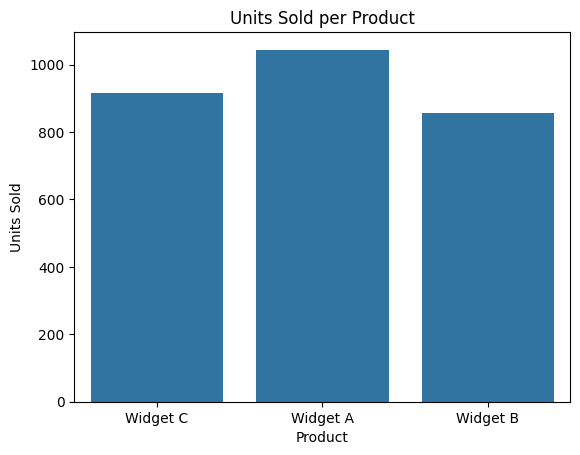

In [49]:
# Step 3: Visualize Units Sold per Product
sns.barplot(x=product_summary.index, y=product_summary['Units Sold'])
plt.title('Units Sold per Product')
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.show()

In [ ]:
# Grouping Bar Chart: Revenue vs Units Sold
# Step 1: Prepare the data
product_summary = df.groupby(['Product'])[['Total Revenue', 'Units Sold']].sum()

metrics = ['Total Revenue', 'Units Sold']
products = product_summary.index.tolist()
bar_width = 0.35
x = np.arange(len(products))


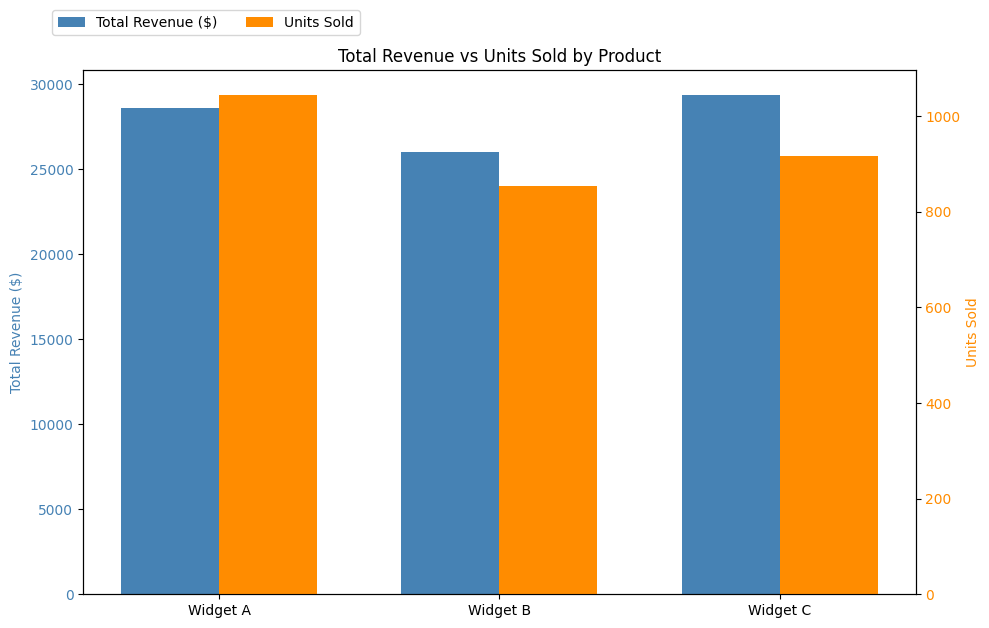

In [54]:
# Step 2: Plot the Bars Side by Side

fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(product_summary.index))

ax1.bar(x - bar_width/2, product_summary['Total Revenue'], width=bar_width, label='Total Revenue ($)', color='steelblue')
ax1.set_ylabel('Total Revenue ($)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, product_summary['Units Sold'], width=bar_width, label='Units Sold', color='darkorange')
ax2.set_ylabel('Units Sold', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

ax1.set_xticks(x)
ax1.set_xticklabels(product_summary.index)
plt.title('Total Revenue vs Units Sold by Product')

fig.legend(loc='upper left', bbox_to_anchor=(0.05, 1.05), ncol=2)
    
plt.tight_layout()
plt.show()


In [55]:
# Question 4: Which Region sold the Most Units Overall?
# Step 1: Group by Region and Sum units sold

units_by_region = df.groupby("Region")["Units Sold"].sum().sort_values(ascending=False)
units_by_region

Region
West     738
South    732
North    712
East     634
Name: Units Sold, dtype: int64

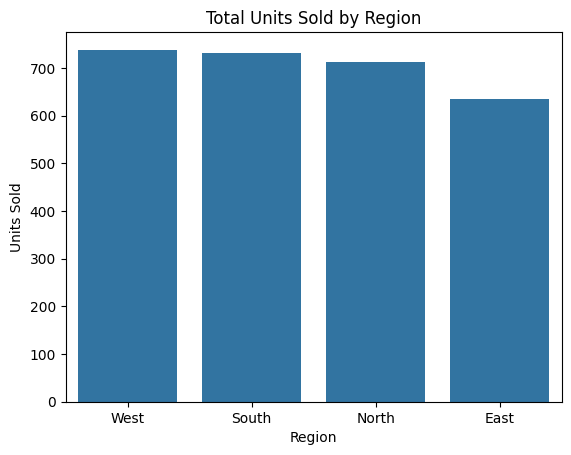

In [56]:
# Step 2: Visualize It - Bar Chart

sns.barplot(x=units_by_region.index, y=units_by_region.values)
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.title('Total Units Sold by Region')
plt.show()

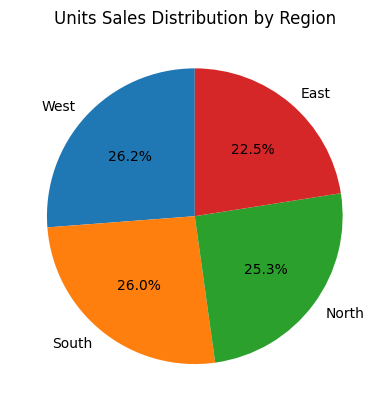

In [57]:
# Step 3: Pie Chart

units_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Units Sales Distribution by Region')
plt.ylabel('')
plt.show()


In [58]:
# Question 5: Which Product Was the Best-Seller in Each Region (by Units Sold)?
# Step 1: Group by Region and Prodcut, the Sum Units Sold

region_prduct_sales = df.groupby(['Region', 'Product'])['Units Sold'].sum()
region_prduct_sales

Region  Product 
East    Widget A    326
        Widget B     58
        Widget C    250
North   Widget A    278
        Widget B    208
        Widget C    226
South   Widget A    165
        Widget B    309
        Widget C    258
West    Widget A    275
        Widget B    280
        Widget C    183
Name: Units Sold, dtype: int64

In [59]:
# Step 2: Find the Top Product per Region

# Reset index to work with DataFrame
region_product_df = region_prduct_sales.reset_index()

# Find the top product per region
top_products = region_product_df.sort_values('Units Sold', ascending=False).groupby('Region').first()
top_products

,Product,Units Sold
Region,,
East,Widget A,326
North,Widget A,278
South,Widget B,309
West,Widget B,280


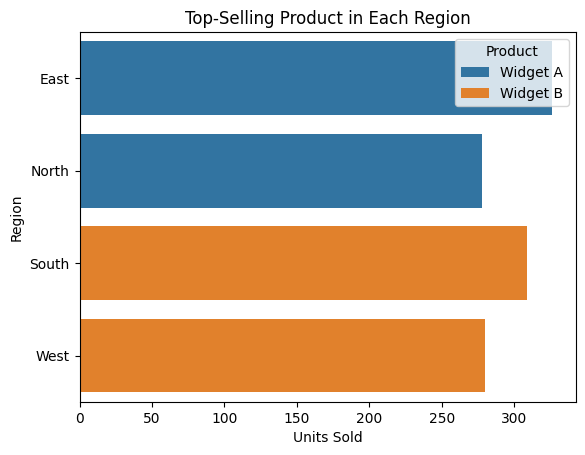

In [64]:
# Visualize with a Horizontal Bar Chart

sns.barplot(x='Units Sold', y=top_products.index, hue='Product', data=top_products.reset_index())
plt.title('Top-Selling Product in Each Region')
plt.xlabel('Units Sold')
plt.ylabel('Region')
plt.legend(title='Product')
plt.show()